In [4]:
#Step 1 : load Csv Dataset


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Try-except block for safe data loading
try:
    iris = load_iris(as_frame=True)
    df = iris.frame  # This is similar to loading a CSV file
    print("✅ Dataset loaded successfully!")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")


✅ Dataset loaded successfully!


 #step 2: Inspect the first row

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Step 3: Explore Data Types and Missing Values

In [7]:
# Check structure and types
df.info()

# Check for null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Step 4: Clean the Dataset (if necessary)

In [8]:
# No missing values found, but this would be the cleaning code:
# df.dropna(inplace=True)
# or
# df.fillna(method='ffill', inplace=True)


Step 1: Descriptive Statistics

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Step 2: Grouping by Categorical Column (`target` as species)

In [10]:
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))
grouped = df.groupby('species').mean()
grouped


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


Data Visualization

In [11]:
sns.set(style='whitegrid')

Line Chart: Petal Length over Index (Simulated Time)

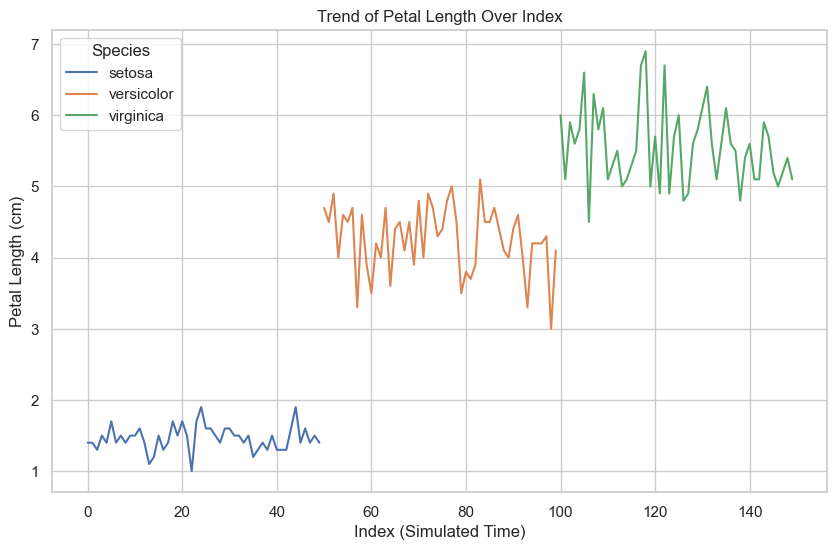

In [12]:
# Add species names from the target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Create a lineplot with the correct 'hue' column
df['index'] = df.index  # Create an 'index' column for x-axis
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='index', y='petal length (cm)', hue='species')
plt.title("Trend of Petal Length Over Index")
plt.xlabel("Index (Simulated Time)")
plt.ylabel("Petal Length (cm)")
plt.legend(title='Species')
plt.show()

plt.show()


Bar Chart: Average Petal Length per Species

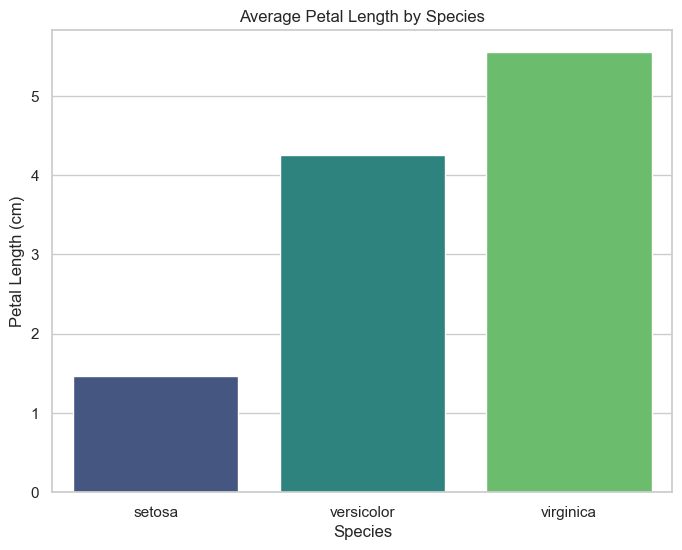

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped.index, y=grouped['petal length (cm)'], hue=grouped.index, palette='viridis', legend=False)
plt.title("Average Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()




Histogram: Sepal Width Distribution

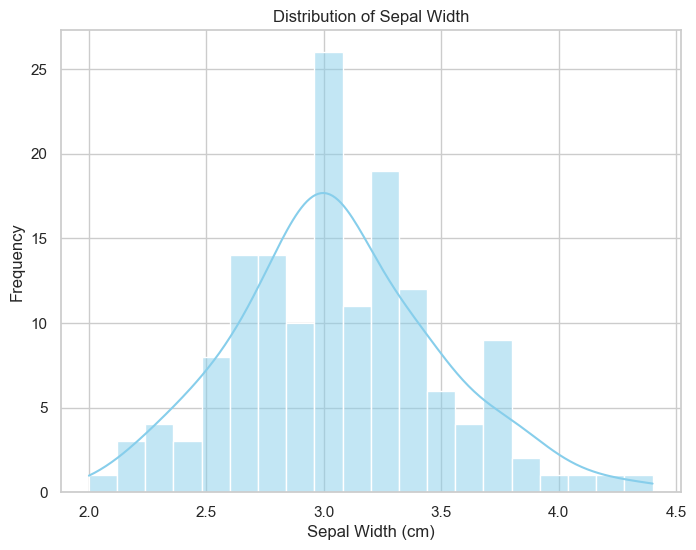

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sepal width (cm)'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()


Scatter Plot: Sepal Length vs Petal Length

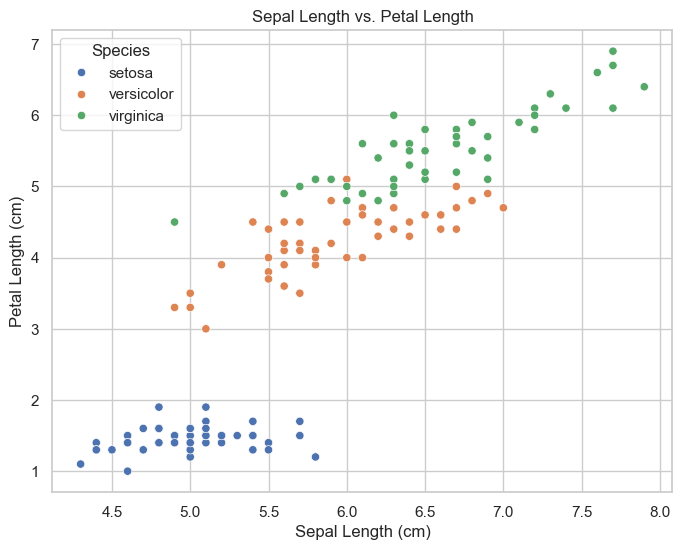

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='deep')
plt.title("Sepal Length vs. Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title='Species')
plt.show()